# Intorduction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy ,SparseCategoricalCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow import keras	 as k	
import numpy as np
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from xgboost import *
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torch import nn
import matplotlib as mpl


# show images

In [3]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25
def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(10)))
  plt.imshow(img)
  plt.axis('off')

In [4]:
transform = transforms.Compose([
    
    transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
#transforms.RandomRotation(20),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(), 

])


In [5]:
# define the images directory
data_dir = "/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256"
print(os.listdir(data_dir))
# let`s make EDA for the dataset
data_splits = os.listdir(data_dir)
for data_kind in data_splits:
    classes = os.listdir(os.path.join(data_dir,data_kind))
    print(f'*We Process the {data_kind}')
    for class_ in classes:
        path = os.path.join(os.path.join(data_dir,data_kind),class_)
        print(f'  we have a {len(os.listdir(path))} images from class {class_}')
    print('')

['Validation', 'Training', 'Testing']
*We Process the Validation
  we have a 151 images from class Late_Blight
  we have a 163 images from class Early_Blight
  we have a 102 images from class Healthy

*We Process the Training
  we have a 1132 images from class Late_Blight
  we have a 1303 images from class Early_Blight
  we have a 816 images from class Healthy

*We Process the Testing
  we have a 141 images from class Late_Blight
  we have a 162 images from class Early_Blight
  we have a 102 images from class Healthy



/tmp/ipykernel_23/3752601153.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))


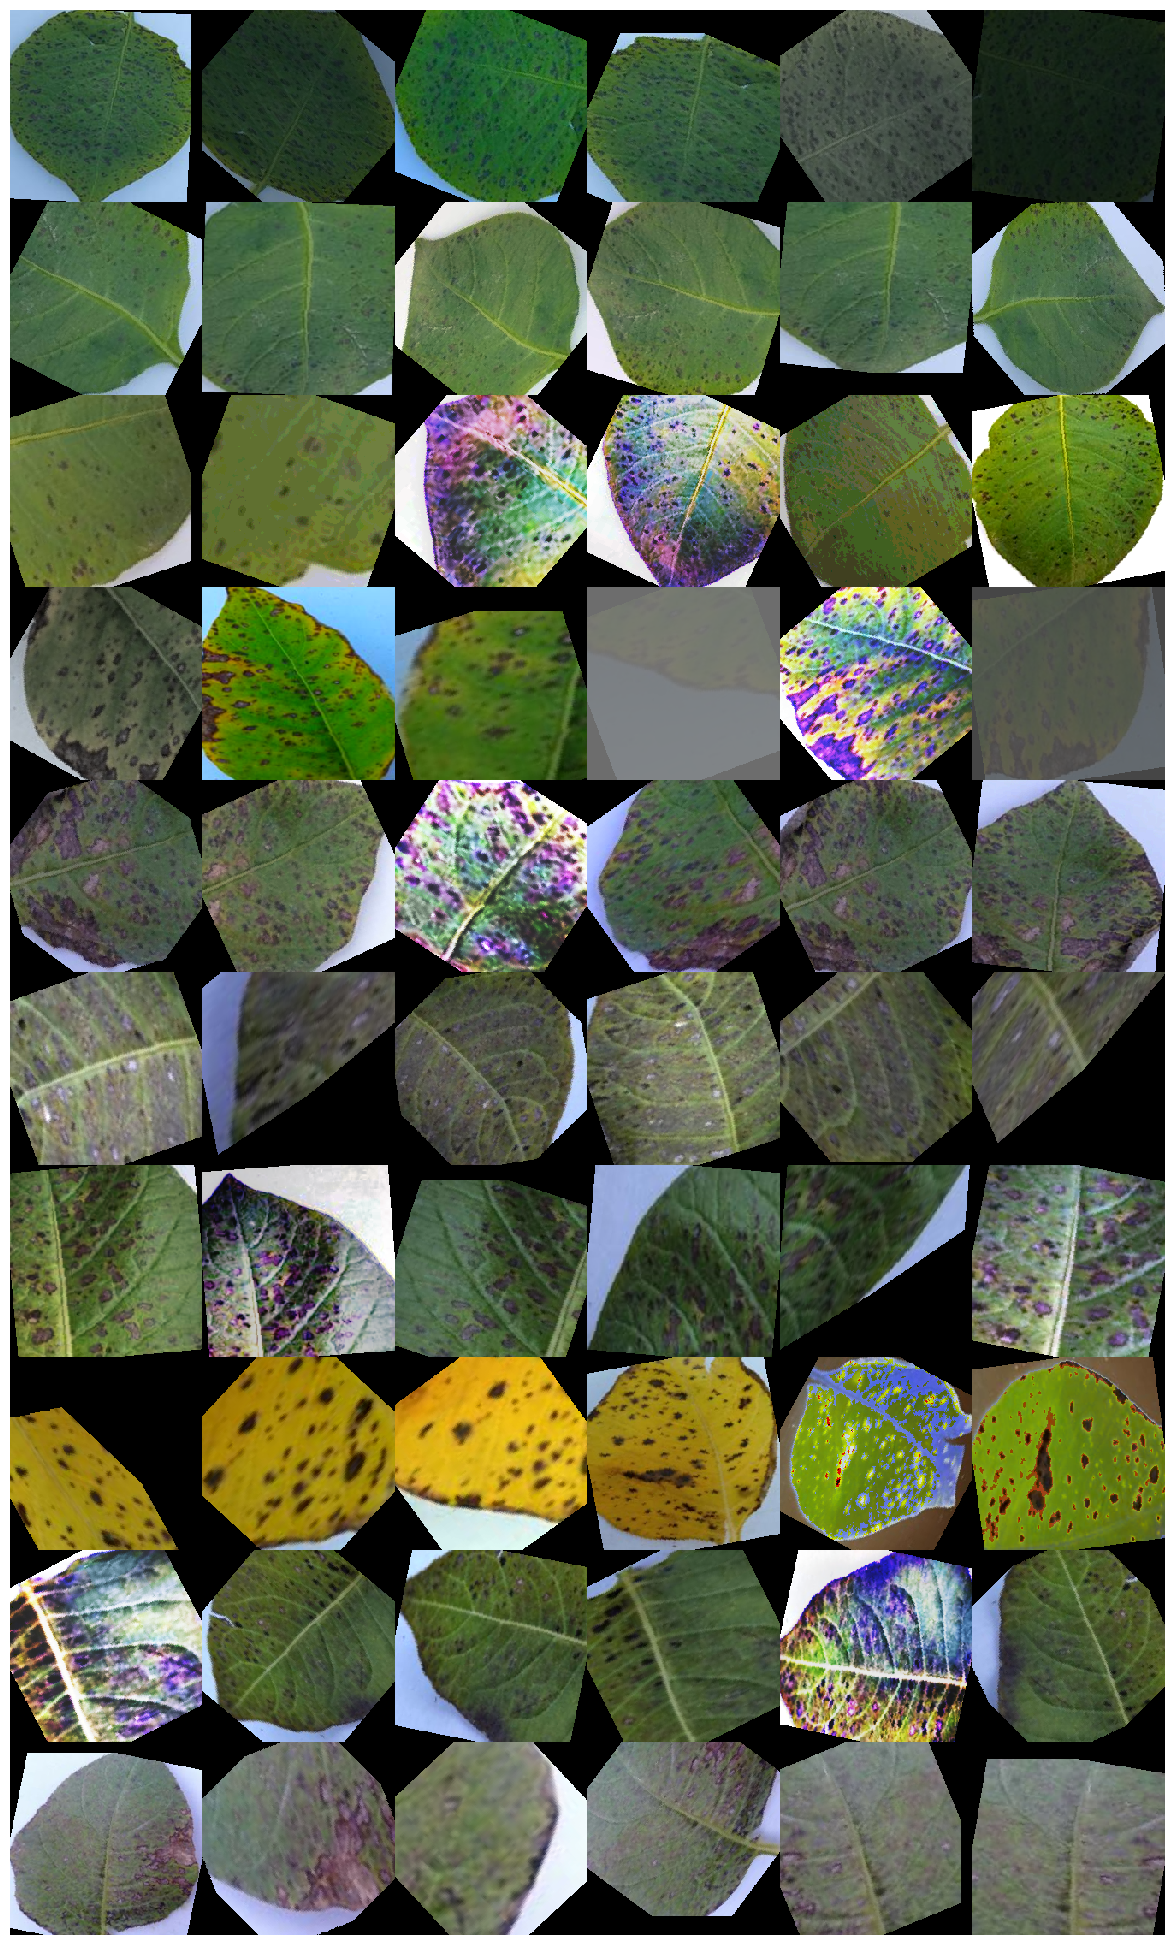

In [6]:

train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
show_dataset(train)

In [7]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
#transforms.RandomRotation(20),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(),
    transforms.ToTensor()
])


 # load images

In [8]:
train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
valid=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation",transform=transform)
test=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing",transform=transform)

In [9]:
train=DataLoader(train,shuffle=True,batch_size=64)
test=DataLoader(test,shuffle=True,batch_size=64)
valid=DataLoader(valid,shuffle=True,batch_size=64)

# build model 1

In [10]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.model =nn.Sequential(
                                nn.BatchNorm2d(3),
nn.Conv2d(3,16, kernel_size=3),            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(16)
                     ,nn.MaxPool2d(2)
                                  
                    ,nn.Conv2d(16,32, kernel_size=3)
                   ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(32)
                    ,nn.MaxPool2d(2)
                      ,nn.Conv2d(32,64, kernel_size=3)
                                  ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2     )
                    ,nn.Conv2d(64,128, kernel_size=3)
                   ,            nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(128)
                                  
                    ,nn.MaxPool2d(2)
                    ,nn.Flatten()
                    ,nn.Linear(18432 ,30),
            nn.ReLU(),
                    nn.Linear(30,3),
                   )

    def forward(self, x):
        return self.model(x)


In [11]:
model=CNNModel().cuda()
loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.001)
s=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True)

In [12]:

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# Train model

In [13]:
ls_train=[]
ls_valid=[]
acc_train=[]
acc_valid=[]
for i in range(100):
    l_train=0
    model.train()
    w=0
    a_t=0
    for (inputs,labels) in train:
        y_p=model(inputs.cuda())
        l=loss(y_p,labels.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        l_train+=l.item()      

        a=accuracy(y_p,labels.cuda())
        w+=1
        a_t+=a
        print(f'\rEpoch {(i + 1)/100} , Batch {w + 1}/{len(train)}, Loss: {l } , accuracy {a}', end='')

    l_valid=0
    model.eval()
    a_valid=0
    with torch.no_grad():
      for (inputs,labels) in valid:
                y_p=model(inputs.cuda()) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_valid+=a  
    ls_train.append(l_train/len(train)  )
    ls_valid.append(l_valid/len(valid) )
    acc_train.append(a_t/len(train))
    acc_valid.append(a_valid/len(valid))
    s.step(l_train/len(train) )                
    print(f"\r loss train :" ,l_train/len(train ), " accuracy :" ,a_t/len(train)," loss valid :" ,l_valid/len(valid) , " accuracy :" ,a_valid/len(valid))                    

 loss train : 1.1626220392245872  accuracy : tensor(0.3746)  loss valid : 1.0520946298326765  accuracy : tensor(0.3906)
 loss train : 1.0176699722514433  accuracy : tensor(0.4762)  loss valid : 0.9554749216352191  accuracy : tensor(0.5446)
 loss train : 0.919066797284519  accuracy : tensor(0.5611)  loss valid : 0.8771618945258004  accuracy : tensor(0.5960)
 loss train : 0.8466901136379615  accuracy : tensor(0.6068)  loss valid : 0.8112456713403974  accuracy : tensor(0.6272)
 loss train : 0.8393626890930475  accuracy : tensor(0.6118)  loss valid : 0.8159394860267639  accuracy : tensor(0.6027)
 loss train : 0.7651659145074732  accuracy : tensor(0.6545)  loss valid : 0.7188681449208941  accuracy : tensor(0.6674)
 loss train : 0.7209483063688465  accuracy : tensor(0.6840)  loss valid : 0.6754713313920158  accuracy : tensor(0.6987)
 loss train : 0.6435514869643193  accuracy : tensor(0.7199)  loss valid : 0.6152811646461487  accuracy : tensor(0.7478)
 loss train : 0.6205752626353619  accurac

# Visualize train progress


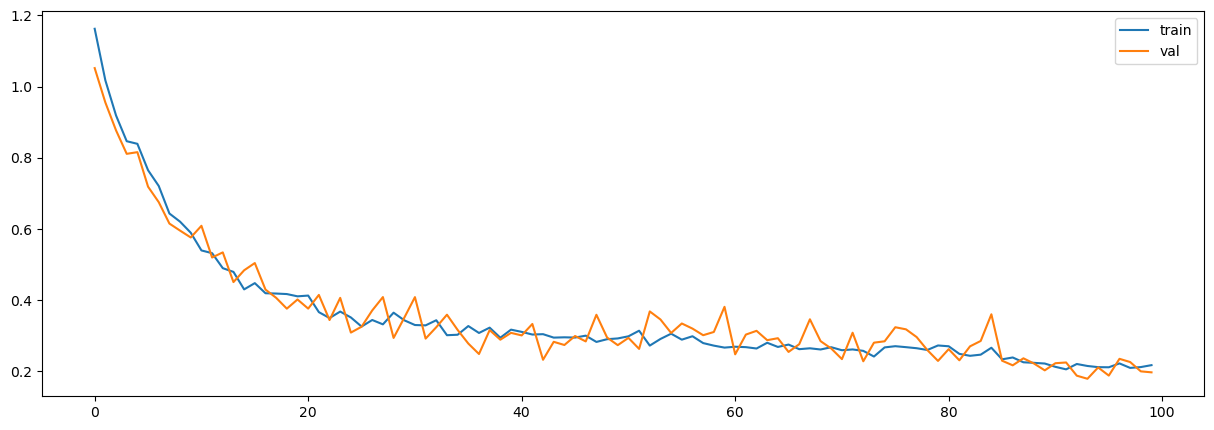

In [14]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 5
plt.plot(range(len(ls_train)),ls_train,label='train')
plt.plot(range(len(ls_valid)),ls_valid,label='val')
plt.legend()

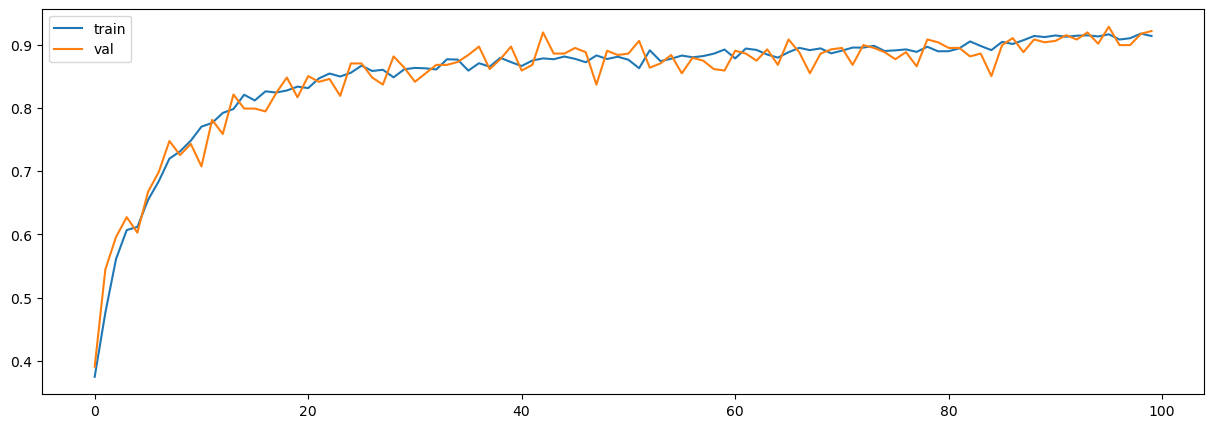

In [15]:
plt.plot(range(len(acc_train)),acc_train,label="train")
plt.plot(range(len(acc_valid)),acc_valid,label="val")
plt.legend()

# Model Evaluation

In [16]:
a_test=0
y_true=[]
y_prdict=[]
model.eval()
l_valid=0
with torch.no_grad():
      for (inputs,labels) in test:
                y_p=model(inputs.cuda()/255) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_test+=a  
                y_true+=labels
                y_prdict+=torch.max(y_p.cpu(),1)[1]
print('accuracy',((a_test/len(test)).item()), "loss", l_valid/len(test))

accuracy 0.3375850319862366 loss 1.0876149790627616


In [17]:
print('accuracy',((a_test/len(test)).item()))

accuracy 0.3375850319862366


# classification report

In [18]:
from sklearn.metrics import classification_report

print(classification_report(np.array(y_prdict),np.array(y_true)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.35      0.52       405

    accuracy                           0.35       405
   macro avg       0.33      0.12      0.17       405
weighted avg       1.00      0.35      0.52       405



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
transform = transforms.Compose([ 
   # transforms.RandomResizedCrop(size=225),
    transforms.RandomHorizontalFlip(),
#transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=360),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 transforms.TrivialAugmentWide(),
   transforms.ToTensor(),
])
transform2 = transforms.Compose([ 
   # transforms.RandomResizedCrop(size=225),
   transforms.ToTensor(),
])


In [20]:
train=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",transform=transform)
valid=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation",transform=transform2)
test=ImageFolder("/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing",transform=transform2)
train=DataLoader(train,shuffle=True,batch_size=64)
test=DataLoader(test,shuffle=True,batch_size=64)
valid=DataLoader(valid,shuffle=True,batch_size=64)

# build model 2

In [21]:
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()

        self.model =nn.Sequential(
                                nn.BatchNorm2d(3),
nn.Conv2d(3,32, kernel_size=3),                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(32)
                     ,nn.MaxPool2d(2)
                                  
                    ,nn.Conv2d(32,64, kernel_size=3)
                   ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2)
                      ,nn.Conv2d(64,64, kernel_size=3)
                                  ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(64)
                    ,nn.MaxPool2d(2 )
                    ,nn.Conv2d(64,128, kernel_size=3)
                   ,                    nn.ReLU(),

                   # nn.ReLU()
                    nn.BatchNorm2d(128)
                                  
                    ,nn.MaxPool2d(2)
                    ,nn.Flatten()
                    ,nn.Linear( 25088 ,200)
                    ,
                                   nn.BatchNorm1d(200)

                    ,     nn.ReLU(),
                    nn.Linear(200,3),
                   )

    def forward(self, x):
        return self.model(x)


In [22]:
model2=CNNModel2().cuda()
optim=torch.optim.Adam(model2.parameters())
sl=torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

# train model

In [23]:
ls_train=[]
ls_valid=[]
acc_train=[]
acc_valid=[]
for i in range(100):
    l_train=0
    model.train()
    w=0
    a_t=0
    for (inputs,labels) in train:
        y_p=model2(inputs.cuda())
        l=loss(y_p,labels.cuda())
        optim.zero_grad()
        l.backward()
        optim.step()
        l_train+=l.item()      

        a=accuracy(y_p,labels.cuda())
        w+=1
        a_t+=a
        print(f'\rEpoch {(i + 1)/100} , Batch {w + 1}/{len(train)}, Loss: {l } , accuracy {a}', end='')

    l_valid=0
    model.eval()
    a_valid=0
    with torch.no_grad():
      for (inputs,labels) in valid:
                y_p=model2(inputs.cuda()) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_valid+=a  
    ls_train.append(l_train/len(train)  )
    ls_valid.append(l_valid/len(valid) )
    acc_train.append(a_t/len(train))
    acc_valid.append(a_valid/len(valid))
    s.step(l_train/len(train) )                
    print(f"\r loss train :" ,l_train/len(train ), " accuracy :" ,a_t/len(train)," loss valid :" ,l_valid/len(valid) , " accuracy :" ,a_valid/len(valid))                    

 loss train : 0.8847253848524654  accuracy : tensor(0.6142)  loss valid : 0.7311945472444806  accuracy : tensor(0.7210)
 loss train : 0.626076750311197  accuracy : tensor(0.7355)  loss valid : 0.5190178113324302  accuracy : tensor(0.8304)
Epoch 0.03 , Batch 52/51, Loss: 0.45061928033828735 , accuracy 0.8235294222831726Epoch 00103: reducing learning rate of group 0 to 1.0000e-05.
 loss train : 0.5036812459721285  accuracy : tensor(0.7983)  loss valid : 0.5418742384229388  accuracy : tensor(0.7879)
 loss train : 0.4570128175557828  accuracy : tensor(0.8172)  loss valid : 0.47775291970797945  accuracy : tensor(0.8125)
 loss train : 0.3542953189097199  accuracy : tensor(0.8552)  loss valid : 0.3603746167251042  accuracy : tensor(0.8772)
 loss train : 0.34190600964368556  accuracy : tensor(0.8552)  loss valid : 0.3096915738923209  accuracy : tensor(0.8973)
 loss train : 0.2939455138117659  accuracy : tensor(0.8862)  loss valid : 0.31564090081623625  accuracy : tensor(0.8906)
 loss train : 0

# Visualize train progress


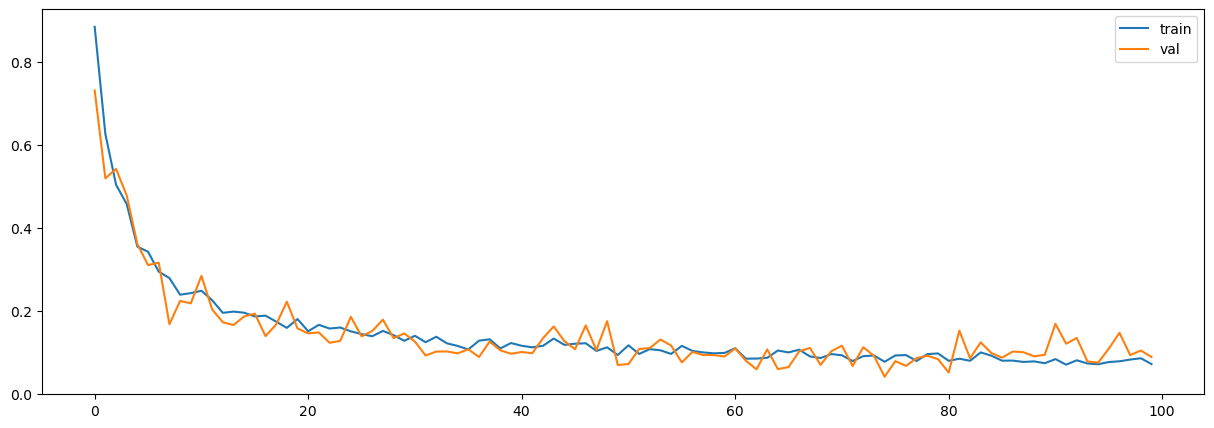

In [24]:
plt.plot(range(len(ls_train)),ls_train,label="train")
plt.plot(range(len(ls_valid)),ls_valid,label="val")
plt.legend()

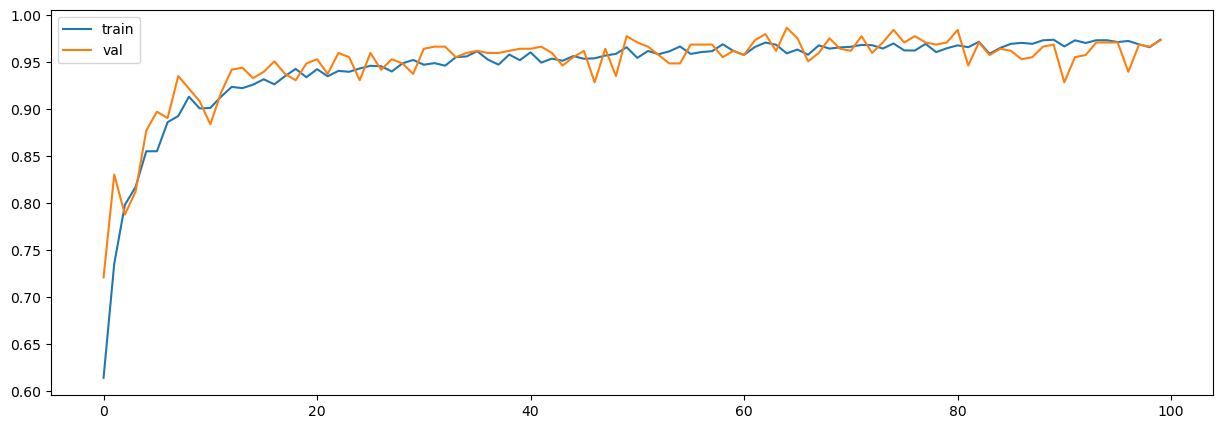

In [25]:
plt.plot(range(len(acc_train)),acc_train,label="train")
plt.plot(range(len(acc_valid)),acc_valid,label="val")
plt.legend()

In [26]:
a_test=0
y_true=[]
y_prdict=[]
model.eval()
l_valid=0
with torch.no_grad():
      for (inputs,labels) in test:
                y_p=model2(inputs.cuda()/255) 
                l=loss(y_p,labels.cuda())
                l_valid+=l.item()
                a=accuracy(y_p,labels.cuda())
                a_test+=a  
                y_true+=labels
                y_prdict+=torch.max(y_p.cpu(),1)[1]
print('accuracy',((a_test/len(test)).item()),"loss ",l_valid)

accuracy 0.984375 loss  0.3845130940899253


In [27]:
from sklearn.metrics import classification_report


# classification report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(np.array(y_prdict),np.array(y_true)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.99      0.95      0.97       106
           2       0.99      0.99      0.99       140

    accuracy                           0.98       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405

